In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns
from sklearn import svm
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier as CL
from sklearn.naive_bayes import GaussianNB

# Importing Iris Dataset from kaggle
data = pd.read_csv(r"C:\Users\zeyad\Desktop\archive\Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Visualizing The Data

In [2]:
H = data.head()
H

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


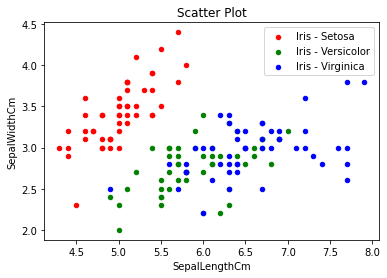

In [3]:
# Plotting our Dataset
ax = data[data.Species=='Iris-setosa'].plot.scatter(x='SepalLengthCm', y='SepalWidthCm', 
                                                    color='red', label='Iris - Setosa')
data[data.Species=='Iris-versicolor'].plot.scatter(x='SepalLengthCm', y='SepalWidthCm', 
                                                color='green', label='Iris - Versicolor', ax=ax)
data[data.Species=='Iris-virginica'].plot.scatter(x='SepalLengthCm', y='SepalWidthCm', 
                                                color='blue', label='Iris - Virginica', ax=ax)
ax.set_title("Scatter Plot")
plt.show()

# Data Cleaning and Preparation

In [4]:
# Checking for null values (data cleaning)
print(data.isnull().sum())

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [5]:
# Checking for duplicate items (data cleaning)
data[data.duplicated()]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species


In [6]:
# Splitting data to features and targets
X = data.iloc[:,1:5]
Y = data.iloc[:,5:6]
x_train , x_test, y_train , y_test = train_test_split(X, Y, test_size=0.3, random_state=None)

# Supervised Learning

In [7]:
# Support Vector Machine
svc_lin = svm.SVC(kernel='linear')
svc_lin.fit(x_train, y_train.values.ravel())
predlin = svc_lin.predict(x_test)
acc = int(accuracy_score(y_test, predlin)*100)

# Calculating the accuracy
print("The Accuracy Is ",acc , '%', sep='')
print(predlin)
print(confusion_matrix(y_test, predlin))

The Accuracy Is 97%
['Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa']
[[11  0  0]
 [ 0 19  1]
 [ 0  0 14]]


In [8]:
#K-Nearest Neighbours Algorithm
model = CL(n_neighbors=3)
model.fit(x_train,y_train.values.ravel())
ypred = model.predict(x_test)
acc = int(accuracy_score(y_test, ypred)*100)
print("Accuracy is ",acc,"%")
print(ypred)
print(confusion_matrix(y_test, ypred))

Accuracy is  95 %
['Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa']
[[11  0  0]
 [ 0 19  1]
 [ 0  1 13]]


In [9]:
# Naive-bayes Algorithm
model = GaussianNB()
model.fit(x_train,y_train.values.ravel())
NBpred = model.predict(x_test)
acc=int(accuracy_score(y_test, NBpred)*100)
print("Accuracy is ",acc,"%")
print(NBpred)
print(confusion_matrix(y_test, NBpred))

Accuracy is  93 %
['Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa']
[[11  0  0]
 [ 0 19  1]
 [ 0  2 12]]


# Unsupervised Learning

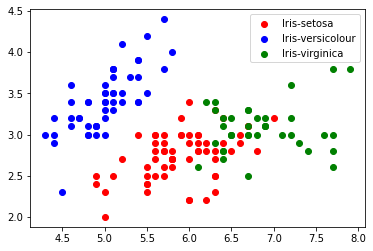

In [10]:
# K-Means Clustering Algorithm
dataset = data.iloc[:, 1:5].values # Removing unnecessary columns
km = KMeans(n_clusters=3, max_iter=30, init='random', random_state=42)
y = km.fit_predict(dataset)

plt.scatter(dataset[y == 0, 0], dataset[y == 0, 1], c = 'red', label = 'Iris-setosa')
plt.scatter(dataset[y == 1, 0], dataset[y == 1, 1], c = 'blue', label = 'Iris-versicolour')
plt.scatter(dataset[y == 2, 0], dataset[y == 2, 1], c = 'green', label = 'Iris-virginica')
plt.legend()
plt.show()

In [11]:
dataNew=data.iloc[:,1:5] #same as dataset to add cluster column
dataNew['cluster']=y.tolist()
print("The centers: ")
print(km.cluster_centers_) #centers
print(" ")
print("The final dataset: ")
print(dataNew.head())

The centers: 
[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.418      1.464      0.244     ]
 [6.85       3.07368421 5.74210526 2.07105263]]
 
The final dataset: 
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  cluster
0            5.1           3.5            1.4           0.2        1
1            4.9           3.0            1.4           0.2        1
2            4.7           3.2            1.3           0.2        1
3            4.6           3.1            1.5           0.2        1
4            5.0           3.6            1.4           0.2        1
